# Exploring 67 years of Lego

Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not.

In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!

# Importing dependencies and Data

The dataset is available on this website: https://rebrickable.com/downloads/

We first explore the colors dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Exploring Colors ######


colors = pd.read_csv('datasets/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [2]:
#info
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 4 columns):
id          139 non-null int64
name        139 non-null object
rgb         139 non-null object
is_trans    139 non-null object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


In [3]:
# How many unique colors did we have?

colors['name'].nunique()

#we have a total of 139 columns and each column has a unique color. 

139

In [4]:
#lets explore the is_trans column
#this tells us if the color is transparent or not. 
#a false or f indicating non-transparent

colors['is_trans'].describe()

count     139
unique      2
top         f
freq      111
Name: is_trans, dtype: object

In [5]:
#This clearly shows that more than 80% of colors were non-transparent
# transparent colors aren't fun anyway

colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,111,111,111
t,28,28,28


### Looking at the Lego sets dataset

In [6]:
####### Exploring sets of Legos #######

sets = pd.read_csv('datasets/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


In [7]:
#Lets see the number of values and column data types
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13980 entries, 0 to 13979
Data columns (total 5 columns):
set_num      13980 non-null object
name         13980 non-null object
year         13980 non-null int64
theme_id     13980 non-null int64
num_parts    13980 non-null int64
dtypes: int64(3), object(2)
memory usage: 546.2+ KB


5 columns and a total of 13980 samples.Nice. Thats a lot of lego Sets made.
Gosh we are exploring 67 years worth of Lego data.

In [8]:
#Lets explore the Year column. Which year contributed to the most Lego sets?
sets['year'].value_counts().head(10)


2014    741
2015    718
2017    703
2018    695
2016    673
2013    647
2012    617
2011    530
2002    498
2003    453
Name: year, dtype: int64

#### looks like 2014 saw the most Lego sets. 
#### Maybe this had to do with the "The Lego Movie" that came out in 2014. 
#### Yep. Thats the reason here. 

In [9]:
#Lets check percentages 

sets['year'].value_counts(normalize=True).head()

#Naah Nothing much here. Since the data is spread over 67 years
#the concentration is also spreaded.

2014    0.053004
2015    0.051359
2017    0.050286
2018    0.049714
2016    0.048140
Name: year, dtype: float64

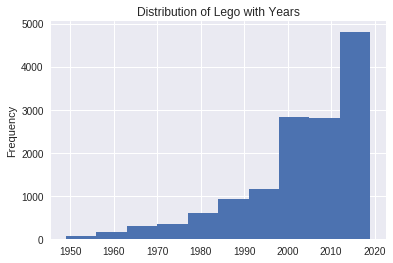

In [10]:
#how about we plot it?
sets['year'].plot(kind='hist', title='Distribution of Lego with Years')

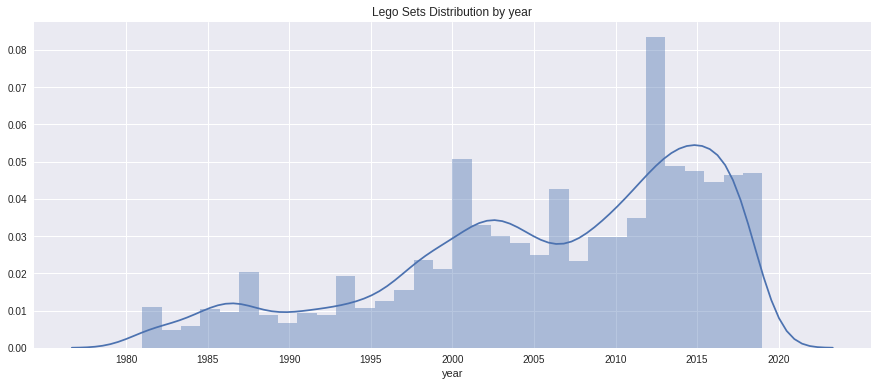

In [16]:
fig, ax =plt.subplots(figsize=(15,6))
sns.distplot(sets[sets['year'] > 1980]['year'], ax=ax)
ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.title("Lego Sets Distribution by year")

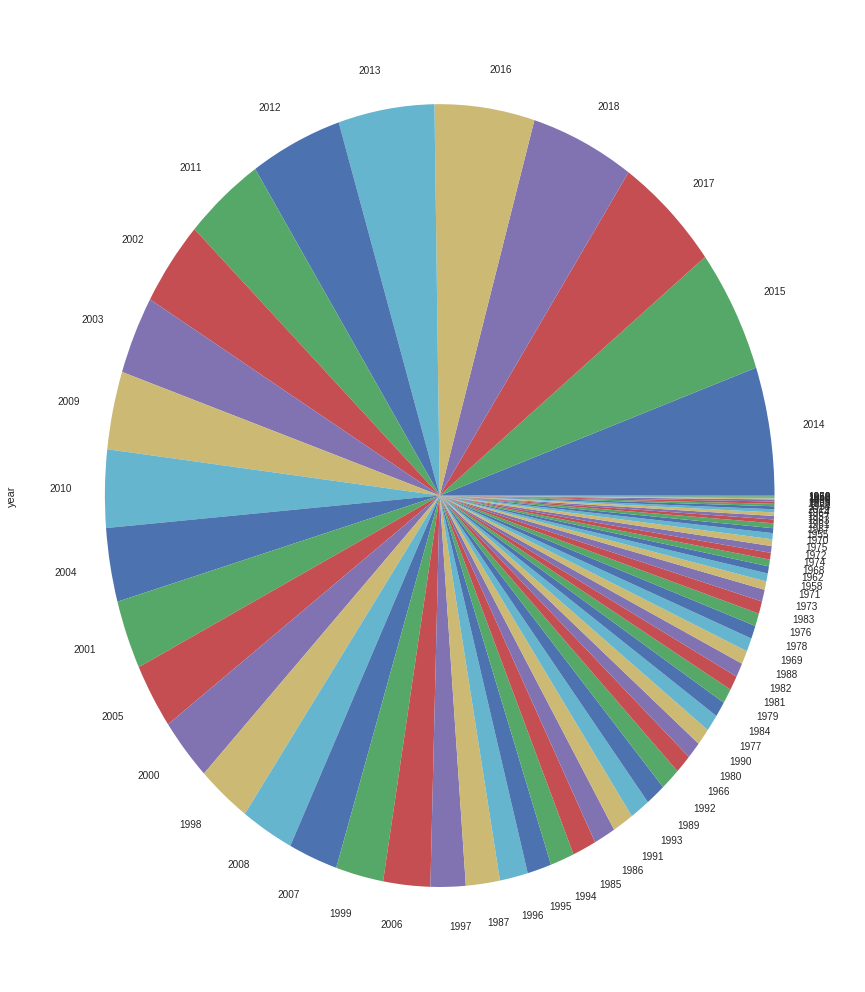

In [13]:
#Yep most of the Legos were created during the 2000's according to this awful looking Pie chart.

sets['year'].value_counts().plot(kind = 'pie', figsize = (15,18))

In [14]:
#Lets get a percentage
#What percentage of the entire legos history was created in the 2000's?


decade_2000 = sets[sets['year'] >=2000].shape[0]/ (sets[sets['year'] < 2000].shape[0] + sets[sets['year'] >=2000].shape[0])
after_lego_movie = sets[sets['year'] >=2014].shape[0] / 13980

print("{}% in the last 18 years.".format(round(decade_2000,2)*100))
print("{}% after the Lego Movie.".format(round(after_lego_movie,2)*100))


70.0% in the last 18 years.
25.0% after the Lego Movie.


#### 70% of all legos were created in the last 18 years out of its 67 years legacy.
#### The new generation certainly likes Lego. 

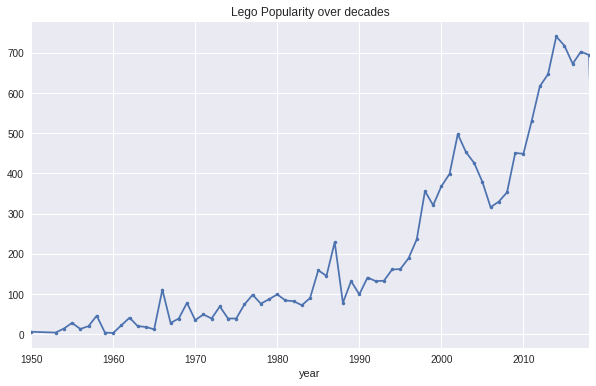

In [15]:
#Lets plot a trend for the Lego wrt years

sets.groupby('year')['num_parts'].count().plot(xlim = (1950,2018), style='.-', figsize=(10,6), 
                                              title='Lego Popularity over decades')

### Exploring themes by year

In [19]:
 # Pretty cool.

print("There are over {} different themes of legos available".format(sets['theme_id'].value_counts().count()))

There are over 636 different themes of legos available


## Wrapping up.

### Thankyou.